In [2]:
#!pip install numpy pandas statsmodels matplotlib

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.meta_analysis import combine_effects, effectsize_smd, effectsize_2proportions
import matplotlib.pyplot as plt

In [16]:
# Create synthetic dataset
data = {
    'author': ['Study1', 'Study2', 'Study3', 'Study4', 'Study5'],
    'year': [1991, 1995, 1999, 2003, 2007],
    'tpos': [30, 45, 28, 50, 60],
    'tneg': [70, 55, 72, 50, 40],
    'cpos': [20, 35, 22, 45, 55],
    'cneg': [80, 65, 78, 55, 45],
    'continent': ['Europe', 'Asia', 'Europe', 'Asia', 'Africa']
}
df = pd.DataFrame(data)



df.head()

,author,year,tpos,tneg,cpos,cneg,continent
0,Study1,1991,30,70,20,80,Europe
1,Study2,1995,45,55,35,65,Asia
2,Study3,1999,28,72,22,78,Europe
3,Study4,2003,50,50,45,55,Asia
4,Study5,2007,60,40,55,45,Africa


In [17]:
# Calculate effect sizes and variances using proportions
df['effect_size'], df['variance'] = effectsize_2proportions(df['tpos'], df['tpos'] + df['tneg'],
                                                            df['cpos'], df['cpos'] + df['cneg'])

                        eff    sd_eff    ci_low    ci_upp      w_fe      w_re
0                  0.100000  0.060828 -0.019220  0.219220  0.234024  0.234024
1                  0.100000  0.068920 -0.035081  0.235081  0.182292  0.182292
2                  0.060000  0.061090 -0.059734  0.179734  0.232017  0.232017
3                  0.050000  0.070534 -0.088243  0.188243  0.174048  0.174048
4                  0.050000  0.069821 -0.086847  0.186847  0.177618  0.177618
fixed effect       0.073136  0.029426  0.015462  0.130810  1.000000       NaN
random effect      0.073136  0.029426  0.015462  0.130810       NaN  1.000000
fixed effect wls   0.073136  0.011497  0.050602  0.095670  1.000000       NaN
random effect wls  0.073136  0.011497  0.050602  0.095670       NaN  1.000000
                        eff    sd_eff    ci_low    ci_upp      w_fe      w_re
0                  0.100000  0.060828 -0.019220  0.219220  0.234024  0.234024
1                  0.100000  0.068920 -0.035081  0.235081  0.182

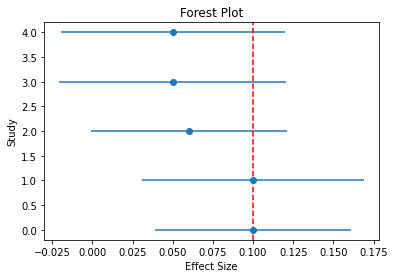

In [20]:
# Conduct meta-analysis
effects = df['effect_size']
variances = df['variance']
result = combine_effects(effects, variances, use_t=False)  # Remove 'method' parameter

# Inspect the summary frame to identify the correct column names
summary_frame = result.summary_frame()
print(summary_frame)

# Extract the combined effect size
combined_effect = summary_frame['eff'].iloc[0]


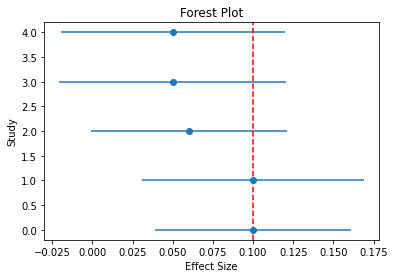

In [21]:
# Plot the forest plot
plt.errorbar(effects, range(len(effects)), xerr=np.sqrt(variances), fmt='o')
plt.axvline(combined_effect, color='r', linestyle='--')
plt.title('Forest Plot')
plt.xlabel('Effect Size')
plt.ylabel('Study')
plt.show()

In [22]:
# Subgroup analysis by continent
continents = df['continent'].unique()
for continent in continents:
    subgroup_data = df[df['continent'] == continent]
    effects = subgroup_data['effect_size']
    variances = subgroup_data['variance']
    result = combine_effects(effects, variances, use_t=False)
    print(f"Subgroup {continent} results:")
    print(result.summary_frame())

Subgroup Europe results:
                        eff    sd_eff    ci_low    ci_upp      w_fe      w_re
0                  0.100000  0.060828 -0.019220  0.219220  0.502153  0.502153
1                  0.060000  0.061090 -0.059734  0.179734  0.497847  0.497847
fixed effect       0.080086  0.043104 -0.004396  0.164569  1.000000       NaN
random effect      0.080086  0.043104 -0.004396  0.164569       NaN  1.000000
fixed effect wls   0.080086  0.020000  0.040887  0.119285  1.000000       NaN
random effect wls  0.080086  0.020000  0.040887  0.119285       NaN  1.000000
Subgroup Asia results:
                        eff    sd_eff    ci_low    ci_upp      w_fe      w_re
0                  0.100000  0.068920 -0.035081  0.235081  0.511568  0.511568
1                  0.050000  0.070534 -0.088243  0.188243  0.488432  0.488432
fixed effect       0.075578  0.049295 -0.021037  0.172194  1.000000       NaN
random effect      0.075578  0.049295 -0.021037  0.172194       NaN  1.000000
fixed effect wls

c:\Users\et\miniconda3\lib\site-packages\statsmodels\stats\meta_analysis.py:620: RuntimeWarning: invalid value encountered in double_scalars
  scale_hksj_re = (weights_re * (eff - mean_effect_re)**2).sum() / df
c:\Users\et\miniconda3\lib\site-packages\statsmodels\stats\meta_analysis.py:621: RuntimeWarning: invalid value encountered in double_scalars
  scale_hksj_fe = (weights_fe * (eff - mean_effect_fe)**2).sum() / df
c:\Users\et\miniconda3\lib\site-packages\statsmodels\stats\meta_analysis.py:622: RuntimeWarning: invalid value encountered in double_scalars
  var_hksj_re = (weights_rel_re * (eff - mean_effect_re)**2).sum() / df
c:\Users\et\miniconda3\lib\site-packages\statsmodels\stats\meta_analysis.py:623: RuntimeWarning: invalid value encountered in double_scalars
  var_hksj_fe = (weights_rel_fe * (eff - mean_effect_fe)**2).sum() / df
c:\Users\et\miniconda3\lib\site-packages\statsmodels\stats\meta_analysis.py:34: RuntimeWarning: invalid value encountered in double_scalars
  self.h2 = 